In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
%matplotlib inline

In [5]:
data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [15]:
x_values = data['Head Size(cm^3)'].values
y_values = data['Brain Weight(grams)'].values

In [16]:
x_mean = np.mean(x_values)
y_mean = np.mean(y_values)

totalValues = len(x_values)

#Calculate M and C (Y intercept) in the formula y = mx + c
numer = 0
denom = 0
for i in range(totalValues):
    numer += (x_values[i] - x_mean) * (y_values[i] - y_mean)
    denom += (x_values[i] - x_mean) ** 2
slope = numer / denom
y_intercept = y_mean - (slope * x_mean)
print(slope, y_intercept)

0.26342933948939945 325.57342104944223


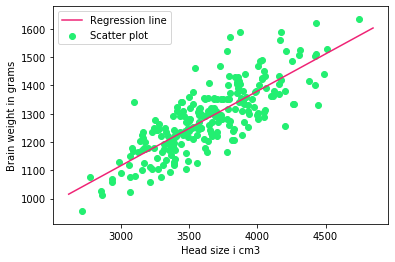

In [23]:
x_max = np.max(x_values) + 100
x_min = np.min(x_values) - 100

# Calculating line values x and y
x = np.linspace(x_min, x_max, 1000)
y = slope * x + y_intercept

plt.plot(x, y, color='#ef2375', label='Regression line')
plt.scatter(x_values, y_values, c='#23ef71', label='Scatter plot')
plt.xlabel('Head size i cm3')
plt.ylabel('Brain weight in grams')
plt.legend()
plt.show()

In [34]:
# Calculate R2 (Coefficient of determination)
total_sum_square_residuals = 0
total_sum_square = 0
for i in range(totalValues):
    y_pred = slope * x_values[i] + y_intercept
    total_sum_square_residuals += (y_pred - y_values[i]) ** 2
    total_sum_square += (y_values[i] - y_mean) ** 2
print(total_sum_square)
print(total_sum_square_residuals)
r2 = 1 - (total_sum_square_residuals / total_sum_square)
print(r2)

3417710.202531648
1232728.0146365522
0.6393117199570003


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_poisson_deviance

# Cannot use rank 1 matrix inscikit learn
x_values = x_values.reshape(totalValues, 1)
linear_reg = LinearRegression()
# Fit training data
linear_reg = linear_reg.fit(x_values, y_values)
# y prediction
y_pred = linear_reg.predict(x_values)

r2_score = linear_reg.score(x_values, y_values)
print(r2_score)

0.639311719957
